In [419]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [18]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [19]:
def fit(x, y, func=lambda x: x, p0=None, r=None, d=None, sigma=None):
    """
        fit takes data points, calculates the curve fit, and gives back
        the values with which the curve can be plotted
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: the function type the curve_fit will be applied to.
        r: determines the size of steps in which the x-achse intervall is split.
        d: tuple which determines the start and end point of the x-achse intervall on which the
            will be drawn. If not given the curve will be drawn between the largest and the smalest
            given x-value.
        Returns:
        -----------
        xnew: x-value with which the fitted curve can be plotted.
        ynew: y-value with which the fitted curve can be plotted.
    """
    import numpy as np
    from scipy.optimize import curve_fit
    popt, pvoc = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    if d == None:
        if r == None:
            xnew = np.arange(min(x), max(x), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(x), max(x), r)
    else:
        if r == None:
            xnew = np.arange(min(d), max(d), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(d), max(d), r)
    ynew = func(xnew, *params)
    return xnew, ynew

In [259]:
def fit_pm(x, y, func=lambda x: x, p0=None, sigma=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2

In [313]:
def Sinusfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, m, k, o, a, b, c, d: m * x**6 + k * x**5 + o * x**4 + a * x**3 + b * x**2 + c * x + d, r=r, d=d, p0=p0, sigma=sigma)
def Sinusfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, m, k, o, a, b, c, d: m * x**6 + k * x**5 + o * x**4 + a * x**3 + b * x**2 + c * x + d, p0=p0, sigma=sigma)

In [314]:
d1_1 = csvReader('V1_1_HM1508.csv')
d1_2 = csvReader('V1_2_HM1508.csv')
d1_3 = csvReader('V1_3_HM1508.csv')
d1_4 = csvReader('V1_4_HM1508.csv')
d1_5 = csvReader('V1_5_HM1508.csv')
d1_6 = csvReader('V1_6_HM1508.csv')
d1_7 = csvReader('V1_7_HM1508.csv')
d1_8 = csvReader('V1_8_HM1508.csv')
d1_9 = csvReader('V1_9_HM1508.csv')
d1_10 = csvReader('V1_10_HM1508.csv')
d1_11 = csvReader('V1_11_HM1508.csv')
d1_12 = csvReader('V1_12_HM1508.csv')
d1_13 = csvReader('V1_13_HM1508.csv')
d1_14 = csvReader('V1_14_HM1508.csv')
d1_15 = csvReader('V1_15_HM1508.csv')
d2_1 = csvReader('V2_1_HM1508.csv')
d2_2 = csvReader('V2_2_HM1508.csv')
d2_3 = csvReader('V2_3_HM1508.csv')
d2_4 = csvReader('V2_4_HM1508.csv')
d2_5 = csvReader('V2_5_HM1508.csv')
d2_6 = csvReader('V2_6_HM1508.csv')
d2_7 = csvReader('V2_7_HM1508.csv')
d2_8 = csvReader('V2_8_HM1508.csv')
d2_9 = csvReader('V2_9_HM1508.csv')
d2_10 = csvReader('V2_10_HM1508.csv')
d2_11 = csvReader('V2_11_HM1508.csv')
d2_12 = csvReader('V2_12_HM1508.csv')

In [374]:
def sinus(x): 
    ### FigureSize
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 7.5
    plt.rcParams["figure.figsize"] = fig_size
    
    ###   Errors / Fit / Plot
    
    plt.plot(x[0][210:1640],x[1][210:1640], label='Datenpunkte der Sägezahnspannung')
    plt.plot(x[0][210:1640],x[2][210:1640], label='Datenpunkte der Polarisation')
    xnew2,ynew2 =  Sinusfit(x[0][210:1640],x[2][210:1640])
    xnew1,ynew1 = TT.linfit(x[0][210:1640],x[1][210:1640])
    k = TT.linfit_pm(x[0][210:1640],x[1][210:1640])
    plt.plot(xnew2,ynew2,label='Sinus Fit')
    plt.plot(xnew1,ynew1,label='Linearer Fit: a=%3.3f, b=%5.3f' % tuple((1,2)))
    
    #k = x[2][210:1640].index(min(x[2][210:1640])) +210
    #plt.plot(x[0][k],min(x[2][210:1640]),'ro')
    #k2 = x[2][210:1640].index(max(x[2][210:1640])) + 210
    #plt.plot(x[0][k2],max(x[2][210:1640]),'ro')
    
    k1 = np.where(ynew2 == min(ynew2))
    #plt.plot(xnew2[k1],(min(ynew2)),'ro')
    k2 = np.where(ynew2 == max(ynew2))
    #plt.plot(xnew2[k2],(max(ynew2)),'ro')
    
    ###   Label / Title
    
    plt.ylabel(r'Spannung$\,[\mathrm{V}]$', fontsize=13)
    plt.xlabel(r'Zeit$\,[\mathrm{s}]$', fontsize=13)
    
    ###   Axes / Grid
    
    axes = plt.gca()  ##  Searches current Axes
    
    axes.set_xlim([0.0021,0.016])
    #axes.set_ylim([-300,370])
    
    #axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
    #axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    
    axes.grid(which='major', linestyle='-', linewidth='1', color='black')
    axes.grid(which='minor', linestyle=':', color='gray')
    axes.minorticks_on()
    
    plt.legend(fontsize=15)
    #plt.savefig('SinusFit.png')
    plt.show()
    y1 = k[0][0] * xnew2[k1] + k[0][1]
    y2 = k[0][0] * xnew2[k2] + k[0][1]
    d = abs(abs(y1)+abs(y2))
    return d

In [392]:
def mean(arr):
    return sum(arr) / len(arr)


def wmean(arr, err):
    if err != None:
        return [sum(arr * err) / sum(err), 1 / sqrt(sum(err))]
    else:
        from uncertainties import ufloat
        return ufloat(sum(arr.n * arr.s) / sum(arr.s), 1 / sqrt(sum(arr.s)))


def meandev(arr, uncertainties=False):
    if uncertainties == True:
        arr = arr.nominal_values()
    m = mean(arr)
    return sqrt((1 / (len(arr) - 1)) * sum((arr - m) ** 2)) / sqrt(len(arr))


def nmean(arr, uncertainties=False):
    from uncertainties import ufloat
    if uncertainties == True:
        arr = arr.nominal_value()
    return ufloat(mean(arr), meandev(arr))


def gmean(arr, error=None, uncertainties=False):
    from uncertainties import ufloat
    if error == None:
        arr_error = []
        arr_value = []
        for i in range(len(arr)):
            arr_error.append(arr[i].std_dev)
            arr_value.append(arr[i].nominal_value)
    else:
        arr_value = arr
        arr_error = error
    g = 1 / np.array(arr_error)**2
    k = g * arr_value
    val = sum(k) / sum(g)
    err = 1 / np.sqrt(sum(g))
    if uncertainties == False:
        return val, err
    else:
        val = ufloat(val,err)
        return val

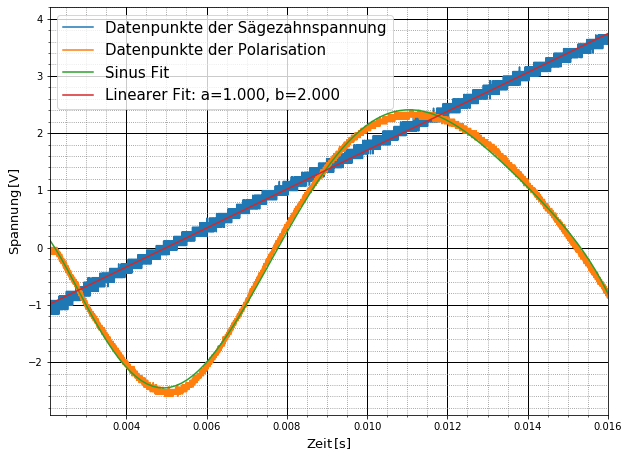

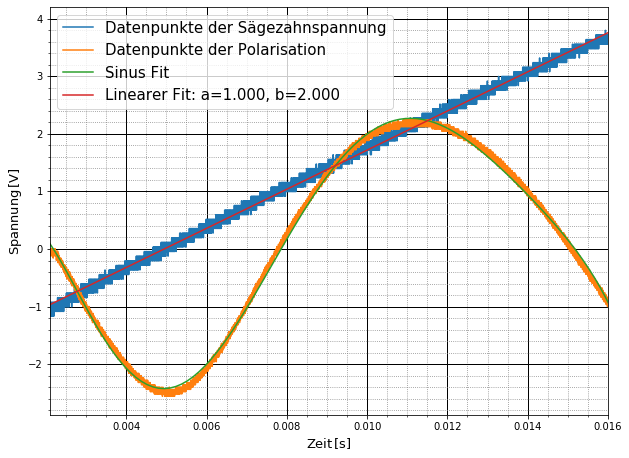

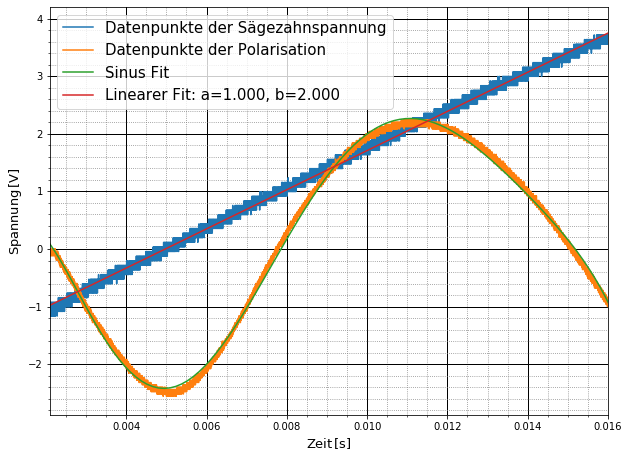

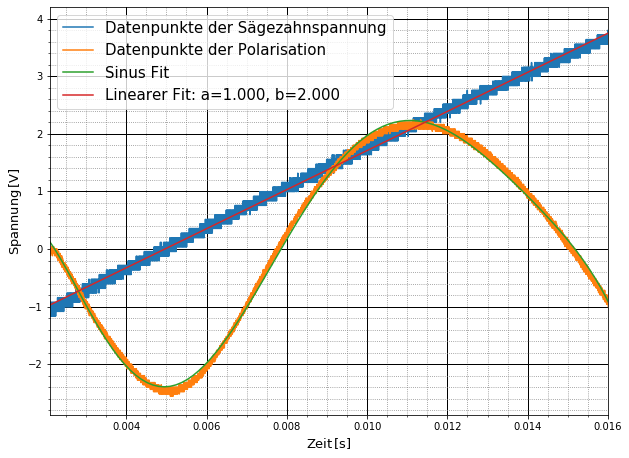

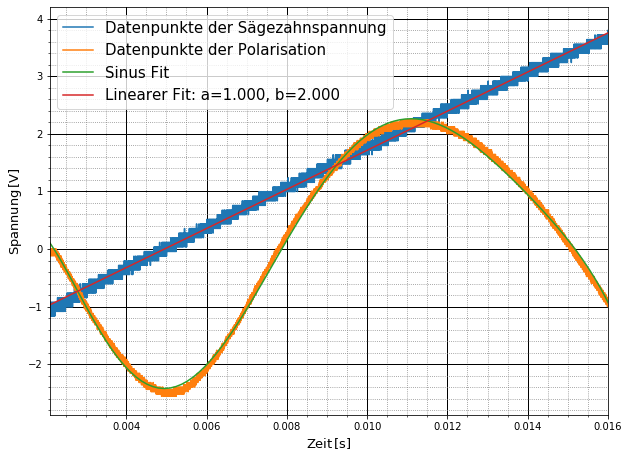

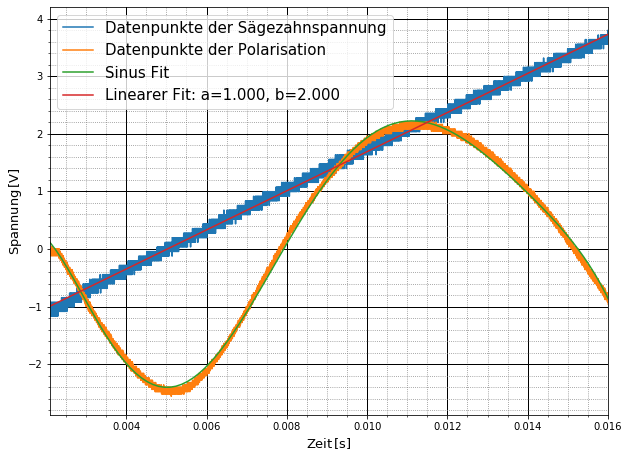

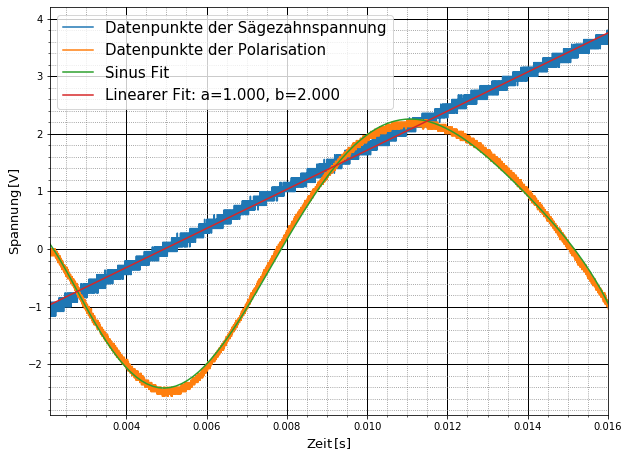

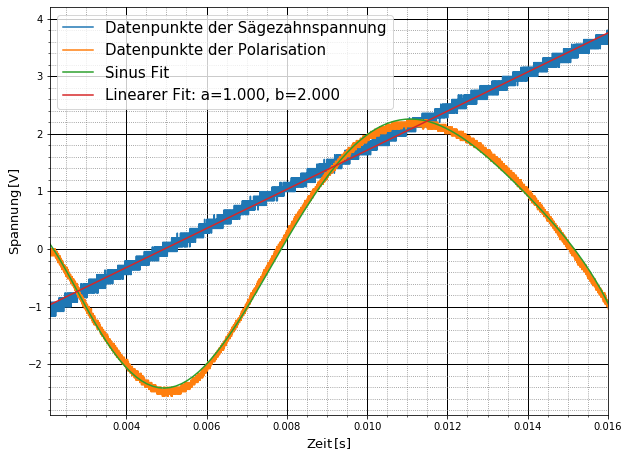

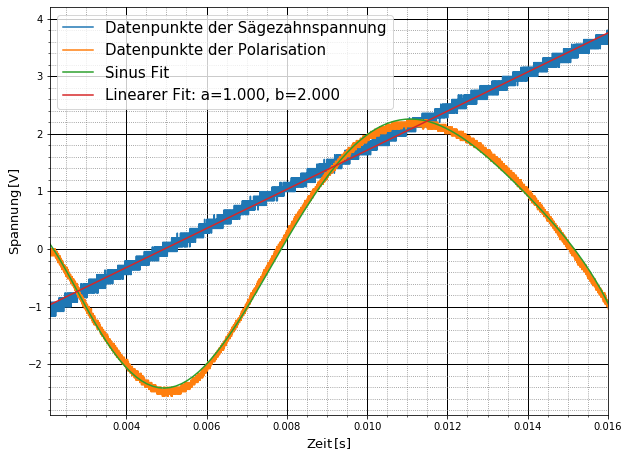

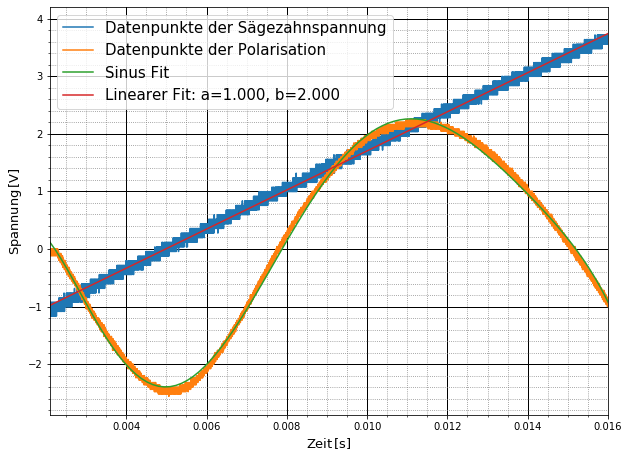

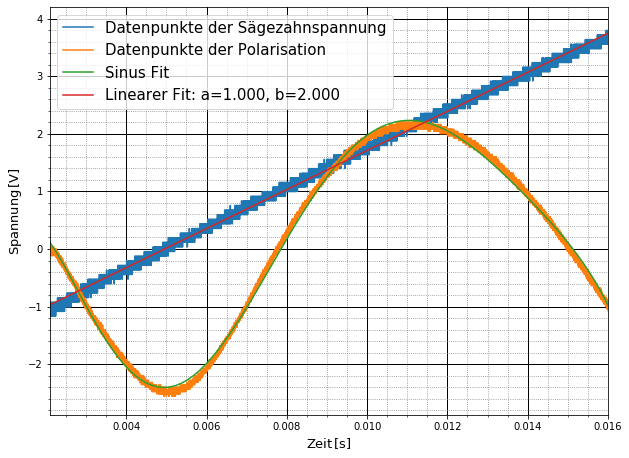

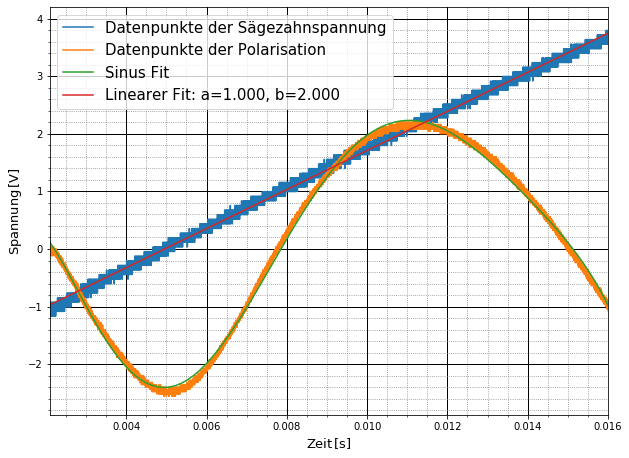

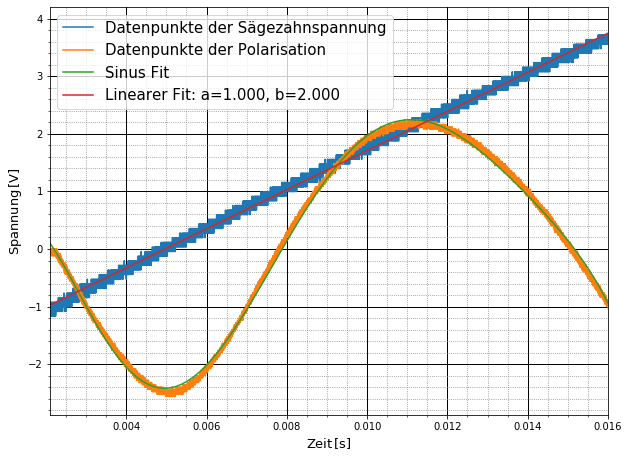

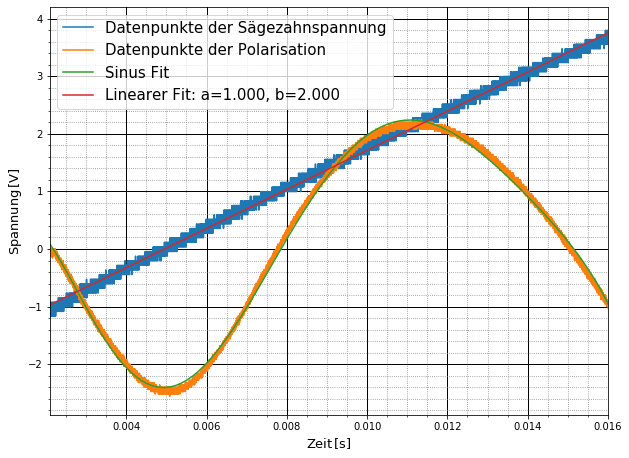

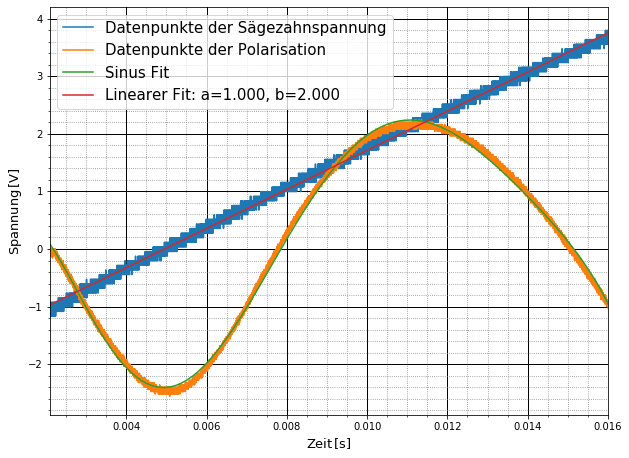

In [393]:
n1 = sinus(d1_1)
n2 = sinus(d1_2)
n3 = sinus(d1_3)
n4 = sinus(d1_4)
n5 = sinus(d1_5)
n6 = sinus(d1_6)
n7 = sinus(d1_7)
n8 = sinus(d1_8)
n9 = sinus(d1_9)
n10 = sinus(d1_10)
n11 = sinus(d1_11)
n12 = sinus(d1_12)
n13 = sinus(d1_13)
n14 = sinus(d1_14)
n15 = sinus(d1_15)
l = [n1[0],n2[0],n3[0],n4[0],n5[0],n6[0],n7[0],n8[0],n9[0],n10[0],n11[0],n12[0],n13[0],n14[0],n15[0]]

In [394]:
nges = gmean(l, uncertainties=True)
print(nges)
print(nges*100)

2.0870+/-0.0014
208.70+/-0.14


In [409]:
lambd = 632.8e-9
d = 2.4e-3
lä = 20e-3
n1 = 1.522
n3 = 1.477
r41_1 = (lambd * d)/(4*lä*nges*100) * (1/2 * (1/n1**2 + 1/n3**2))**(3/2)

In [479]:
V2_p = nmean(np.array([123.3,122.5,122.7,121.8,123.1,123.2]))
V2_n = nmean(np.array([133.6,132.5,132.9,132.5,132.4,133.1]))
V2_diff = abs(V2_p + V2_n)

In [481]:
r41_2 = (lambd * d)/(4*lä*V2_diff) * (1/2 * (1/n1**2 + 1/n3**2))**(3/2)

In [482]:
print(r41_1,r41_2)

(2.7007+/-0.0017)e-11 (2.2051+/-0.0026)e-11


# Faraday

In [421]:
epsilon = ufloat(7.6,0.05)+ufloat(6.9,0.05)
print(epsilon)

14.50+/-0.07


In [437]:
Spannung = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,0,-0.5,-1,-1.5,-2,-2.5,-3,-3.5,-4,-4.5,-5]
angle = [0.9,2.4,3.35,5,6.3,7.33,8.65,9.95,11.05,12.3,13.85,0.65,-0.5,-1.7,-3.5,-4.9,-6.8,-7.1,-8.45,-9.8,-11.2,-12.3]

No handles with labels found to put in legend.


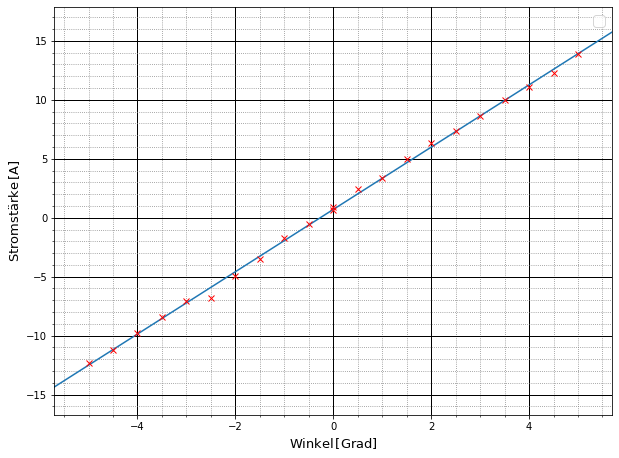

In [462]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

xnewV2 ,ynewV2 = TT.linfit(Spannung,angle, d=(-6,6))
para = TT.linfit_pm(Spannung,angle)
plt.plot(xnewV2,ynewV2)
plt.plot(Spannung,angle,'x',color='red')

###   Label / Title

plt.ylabel(r'Stromstärke$\,[\mathrm{A}]$', fontsize=13)
plt.xlabel(r'Winkel$\,[\mathrm{Grad}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([-5.7,5.7])
#axes.set_ylim([-300,370])
 
#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
#plt.savefig('Eichung.png')
plt.show()

In [463]:
V = para[0][0]/2556

In [476]:
print('{:L}'.format(V))
print('{:L}'.format(V * 60 * 79.59/100))

0.001034 \pm 0.000008
0.0494 \pm 0.0004


In [477]:
V2 = para[0][0]/(3600 * 150e-3 / 175e-3)

In [478]:
print('{:L}'.format(V2))
print('{:L}'.format(V2 * 60 * 79.59/100))

0.000856 \pm 0.000007
0.04088 \pm 0.00032
